# PyTorch basics, Adaline, MLP, and multi-class classification

Hansi YANG, hyangbw@connect.ust.hk

## Basic Operations in PyTorch

What is PyTorch? 

Long answer: see the [homepage for PyTorch](https://pytorch.org/)

Short answer: just treat it as a package to define arrays and compute gradients

The first step to use PyTorch: import package

In [1]:
import torch
import torch.nn as nn

Now we see some examples to define vector or matrix

In [2]:
torch.manual_seed(0)
vec_example_1 = torch.randn(4)
vec_example_2 = torch.rand(4)
vec_example_3 = torch.zeros(4)
vec_example_4 = torch.ones(4)
vec_example_5 = torch.randint(8, (4,))
mat_example = torch.randn((4,4))
print('Gaussian random vector:', vec_example_1)
print('Unifom random vector (in [0,1]):', vec_example_2)
print('All zero vector:', vec_example_3)
print('All one vector:', vec_example_4)
print('Uniform random integer vector from 0-7:', vec_example_5)
print('Gaussian random matrix:', mat_example)

Gaussian random vector: tensor([ 1.5410, -0.2934, -2.1788,  0.5684])
Unifom random vector (in [0,1]): tensor([0.4556, 0.6323, 0.3489, 0.4017])
All zero vector: tensor([0., 0., 0., 0.])
All one vector: tensor([1., 1., 1., 1.])
Uniform random integer vector from 0-7: tensor([4, 7, 6, 0])
Gaussian random matrix: tensor([[-1.3527, -1.6959,  0.5667,  0.7935],
        [ 0.5988, -1.5551, -0.3414,  1.8530],
        [ 0.7502, -0.5855, -0.1734,  0.1835],
        [ 1.3894,  1.5863,  0.9463, -0.8437]])


These are almost identical to the operations in NumPy ~~(Ctrl-F numpy/np->torch)~~

The term "tensor" refers to a combination for vectors (1 axis), matrices (2 axis) and data structures with more axes. 

By now, we only need to consider vectors or matrices in most cases, so just treat it as an alternative name

## Adaline in PyTorch

Now we see how we can implement Adaline in PyTorch

The output of Adaline is given by $o(\vec{w})=\sum_{i=0}^n w_i x_i$, i.e. the dot product between the weight vector $\vec{w}$ and the feature vector $\vec{x}$

Here is its implementation in PyTorch:

In [3]:
torch.manual_seed(0)
feat_dim = 4
w = torch.randn(feat_dim+1)
x = torch.cat((torch.ones(1), torch.randn(feat_dim)), dim=0) # Concatenate a 1 element to, i.e. x=[1,x1,x2,x3,x4]
pred = torch.dot(x,w)
print('Weight:', w)
print('Input:', x)
print('Prediction:', pred)

Weight: tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845])
Input: tensor([ 1.0000, -1.3986,  0.4033,  0.8380, -0.7193])
Prediction: tensor(2.3290)


This example only contains one training sample. To use more training samples, consider using a matrix as follows:

In [4]:
feat_dim = 4
num_train = 8
X = torch.cat((torch.ones(num_train, 1), torch.randn(num_train, feat_dim)), dim=1) 
print(X.shape)

torch.Size([8, 5])


Looks good: number of training samples $\times$ number of features

Now we see how to compute the prediction

In [5]:
pred = torch.mv(X, w) # mv stands for "matrix-vector product"
print(pred, pred.shape)

tensor([ 2.5498,  2.2794, -0.8701, -0.3941,  1.0529,  3.2605, -2.7426,  0.3267]) torch.Size([8])


Also looks good, we have exactly the same number of predictions

Now we generate the target and see the difference between prediction and target

In [6]:
torch.manual_seed(0)
target = torch.randn(num_train)
print('Prediction:', pred)
print('Target:', target)
print('Difference:', pred-target)

Prediction: tensor([ 2.5498,  2.2794, -0.8701, -0.3941,  1.0529,  3.2605, -2.7426,  0.3267])
Target: tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845, -1.3986,  0.4033,  0.8380])
Difference: tensor([ 1.0088,  2.5728,  1.3087, -0.9626,  2.1374,  4.6591, -3.1460, -0.5113])


Does not look so good, so we need to optimize the weights now



Recall that in lecture, the gradient for $\vec{w}$ is given by:
$$\frac{\partial E}{\partial w_i} = \sum_d (t_d - o_d) (-x_{i,d})$$
where $d$ indexes training samples, $i$ indexes features

When we have only one training samples, we simply have:
$$\frac{\partial E}{\partial w_i} = (t_d - o_d) (-x_{i,d})$$
and here is how to compute it in PyTorch

In [7]:
torch.manual_seed(0)
feat_dim = 4
w = torch.randn(feat_dim+1)
x = torch.cat((torch.ones(1), torch.randn(feat_dim)), dim=0)
pred = torch.dot(x,w)
target = torch.randn(1)

grad_w = (target-pred)*(-x)
print('Weight:', w)
print('Gradient:', grad_w)
print('Weight shape:', w.shape)
print('Gradient shape:', grad_w.shape)

Weight: tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845])
Gradient: tensor([ 2.7323, -3.8214,  1.1021,  2.2898, -1.9653])
Weight shape: torch.Size([5])
Gradient shape: torch.Size([5])


Now we can implement gradient descent as follows:

In [8]:
pred = torch.dot(x,w)
print('Prediction:', pred)
print('Target:', target)
print('Difference before training:', pred-target)
num_iter = 1000
alpha = 1e-2

for _ in range(num_iter):
    pred = torch.dot(x,w)
    grad_w = (target-pred)*(-x)
    w = w - alpha*grad_w
    
pred = torch.dot(x,w)
print('Prediction:', pred)
print('Target:', target)
print('Difference after training:', pred-target)

Prediction: tensor(2.3290)
Target: tensor([-0.4033])
Difference before training: tensor([2.7323])
Prediction: tensor(-0.4033)
Target: tensor([-0.4033])
Difference after training: tensor([2.0862e-07])


Looks good now: we almost completely eliminate the error

Now we see how to compute the gradient on more training samples by matrix multiplication

In [9]:
torch.manual_seed(0)
feat_dim = 4
num_train = 8

w = torch.randn(feat_dim+1)
X = torch.cat((torch.ones(num_train, 1), torch.randn(num_train, feat_dim)), dim=1)
pred = torch.mv(X, w)
target = torch.randn(num_train)

grad_w_1 = torch.zeros(5)
for iii in range(num_train):
    grad_w_1 = grad_w_1+(target[iii]-pred[iii])*(-X[iii])

grad_w_2 = -torch.mv(X.t(), target-pred)

print('Weight:', w)
print('Gradient from direct implementation:', grad_w_1)
print('Gradient from matrix multiplication:', grad_w_2)
print('Weight shape:', w.shape)
print('Gradient shape:', grad_w_1.shape, grad_w_2.shape)

Weight: tensor([ 1.5410, -0.2934, -2.1788,  0.5684, -1.0845])
Gradient from direct implementation: tensor([ 14.9825,  -3.1721, -12.5810,  -2.1126,  -9.2198])
Gradient from matrix multiplication: tensor([ 14.9825,  -3.1721, -12.5810,  -2.1126,  -9.2198])
Weight shape: torch.Size([5])
Gradient shape: torch.Size([5]) torch.Size([5])


Then the code for gradient descent is similar to before

In [10]:
pred = torch.mv(X, w)
print('Prediction:', pred)
print('Target:', target)
print('Difference before training:', pred-target)
num_iter = 1000
alpha = 1e-3

for _ in range(num_iter):
    pred = torch.mv(X, w)
    grad_w = -torch.mv(X.t(), target-pred)
    w = w - alpha*grad_w
    
pred = torch.mv(X, w)
print('Prediction:', pred)
print('Target:', target)
print('Difference after training:', pred-target)

Prediction: tensor([-0.8752,  5.0945,  3.4886,  2.2990, -0.3735,  1.1027,  4.2928, -0.3772])
Target: tensor([-1.3986,  0.9398,  0.7748,  0.1919,  1.2638, -1.2904, -0.7911, -0.0209])
Difference before training: tensor([ 0.5234,  4.1547,  2.7138,  2.1071, -1.6372,  2.3932,  5.0839, -0.3563])
Prediction: tensor([-0.8118,  0.5724,  0.9977,  0.1497,  0.1355, -0.6792, -0.6944, -0.1756])
Target: tensor([-1.3986,  0.9398,  0.7748,  0.1919,  1.2638, -1.2904, -0.7911, -0.0209])
Difference after training: tensor([ 0.5868, -0.3674,  0.2228, -0.0421, -1.1283,  0.6112,  0.0967, -0.1547])


Not so good as before, as these data points cannot be fitted by single line

But in general, we managed to reduce the errors

## Perceptron in PyTorch

Based on our previous implementation of Adaline, we can also easily implement Perceptron in PyTorch, as we only need to add a step function in the final

In [9]:
torch.manual_seed(0)
num_train = 8
feat_dim = 4
threshold = 0
w = torch.randn(feat_dim+1)
X = torch.cat((torch.ones(num_train, 1), torch.randn(num_train, feat_dim)), dim=1) 
pred = torch.mv(X, w)>threshold
print('Prediction of Perceptron:', pred)

Prediction of Perceptron: tensor([False,  True,  True,  True, False,  True,  True, False])


## Optimization Trajectory of Gradient Descent

Recall the figures in lecture that visualizes the dynamics of gradient descent

Now we see how these figures are actually plotted

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, line_search

torch.manual_seed(0)
num_train = 8
w_gt = torch.rand(2)
X = torch.randn(num_train, 2)
target = torch.mv(X, w_gt)

def adaline_vectorized(w0, w1):
    f = torch.zeros_like(w0)
    for iii in range(num_train):
        f = f + 1/2*(X[iii,0]*w0+X[iii,1]*w1-target[iii])*(X[iii,0]*w0+X[iii,1]*w1-target[iii])
    return f

def gradient_descent(X, target, stepsize):
    torch.manual_seed(1)
    x_i, y_i = torch.rand(2)*5
    all_x_i = list()
    all_y_i = list()

    for i in range(1, 100):
        all_x_i.append(x_i.item())
        all_y_i.append(y_i.item())
        pred = torch.sum(X[:,0]*x_i+X[:,1]*y_i)
        dx_i = torch.sum(X[:,0]*(X[:,0]*x_i+X[:,1]*y_i-target))
        dy_i = torch.sum(X[:,1]*(X[:,0]*x_i+X[:,1]*y_i-target))
        x_i += - stepsize*dx_i
        y_i += - stepsize*dy_i
    ttl = 'step size {:0.3f}'.format(stepsize)
        
    nsteps = 20
    plt.scatter(all_x_i[:nsteps], all_y_i[:nsteps])
    plt.plot(all_x_i[:nsteps], all_y_i[:nsteps])
    plt.title(ttl)
    plt.tight_layout()
    plt.show()

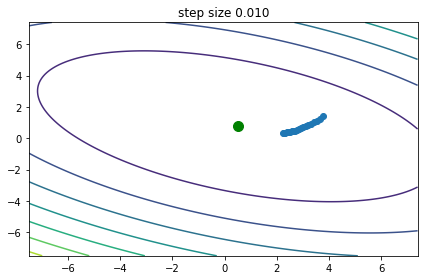

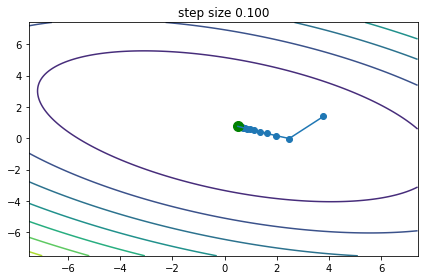

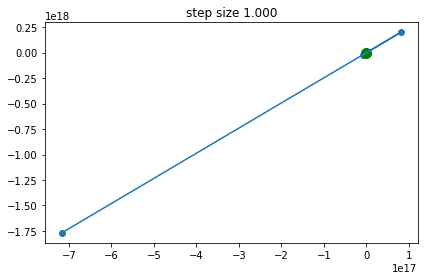

In [12]:
w1 = np.arange(-7.5, 7.5, 0.1)
w2 = np.arange(-7.5, 7.5, 0.1)
w = np.meshgrid(w1, w2)
z = adaline_vectorized(torch.as_tensor(w[0]), torch.as_tensor(w[1]))

plt.figure()
step_sizes = [1e-2, 1e-1, 1]
for i, step in enumerate(step_sizes):
    plt.contour(w1, w2, z)
    plt.plot(w_gt[0], w_gt[1], 'go', markersize=10)
    gradient_descent(X, target, step)

## MLP

### Another way to implement Adaline 

Before introducing MLP, we introduce the third way to implement Adaline by PyTorch's nn API

In [13]:
torch.manual_seed(0)
Adaline = nn.Sequential(nn.Linear(4, 1))
print(Adaline[0].weight, Adaline[0].bias)

Parameter containing:
tensor([[-0.0037,  0.2682, -0.4115, -0.3680]], requires_grad=True) Parameter containing:
tensor([-0.1926], requires_grad=True)


Then we do not need to consider the additional bias term, as it is already included

In [14]:
X = torch.randn(num_train, feat_dim)
pred_1 = Adaline(X)
pred_2 = torch.mv(X, Adaline[0].weight[0])+Adaline[0].bias[0]

print('Prediction from nn API:', pred_1)
print('Prediction from manual computation:', pred_2)
print('Prediction shape:', pred_1.shape, pred_2.shape)

Prediction from nn API: tensor([[ 0.7216],
        [ 0.0541],
        [ 0.5882],
        [-0.3144],
        [-1.2131],
        [ 0.0245],
        [ 0.0596],
        [ 0.0909]], grad_fn=<AddmmBackward0>)
Prediction from manual computation: tensor([ 0.7216,  0.0541,  0.5882, -0.3144, -1.2131,  0.0245,  0.0596,  0.0909],
       grad_fn=<AddBackward0>)
Prediction shape: torch.Size([8, 1]) torch.Size([8])


Some of you may note the additional "requires_grad" and "grad_fn": what are they? 

You could guess from this abbreviation that they are both related to gradient ("grad"). 
It actually enables us to directly compute the objective gradient by PyTorch, instead of doing it all by ourselves like before. 

You will learn these (called "auto-differentiation") in later tutorials, so we may just skip it now. 
If you are interested and would like to learn in advance, the [PyTorch tutorial](https://pytorch.org/tutorials/) could be a good start

### Implementing MLP
Now we are ready to implement MLP. Recall that basically MLP is matrix multiplication plus nonlinear activation 
- Without the nonlinear activation, multiplying these weights together will give us exactly the same as a single layer (i.e. Adaline)

PyTorch also provides us simple ways to add usual activation functions. For example, for ReLU activation ($\text{ReLU}(x)=\max(x,0)$), we only need an additional line:

In [15]:
torch.manual_seed(0)
MLP_relu = nn.Sequential(nn.Linear(4,16), 
                      nn.ReLU(), 
                      nn.Linear(16,1))

In [16]:
print(MLP_relu[0].weight.shape, MLP_relu[0].bias.shape, MLP_relu[2].weight.shape, MLP_relu[2].bias.shape)

torch.Size([16, 4]) torch.Size([16]) torch.Size([1, 16]) torch.Size([1])


In [17]:
pred_relu = MLP_relu(X)
print(pred_relu)

tensor([[-0.3242],
        [ 0.0026],
        [-0.0416],
        [ 0.1356],
        [ 0.3286],
        [-0.0198],
        [-0.1279],
        [-0.1684]], grad_fn=<AddmmBackward0>)


PyTorch also has many other types of activation functions. 

Another example: sigmoid function $\text{Sigmoid}(x)=\frac{1}{1+\exp(-x)}$

In [18]:
MLP_sigmoid = nn.Sequential(nn.Linear(4,16), 
                      nn.Sigmoid(), 
                      nn.Linear(16,1))

We can load the weights of MLP\_relu to MLP\_sigmoid. With different activation functions, their prediction is different even with the same weights

In [19]:
MLP_sigmoid[0].weight = MLP_relu[0].weight
MLP_sigmoid[0].bias = MLP_relu[0].bias
MLP_sigmoid[2].weight = MLP_relu[2].weight
MLP_sigmoid[2].bias = MLP_relu[2].bias
pred_sigmoid = MLP_sigmoid(X)
print(pred_sigmoid)

tensor([[-0.1349],
        [ 0.0114],
        [-0.0164],
        [ 0.1028],
        [ 0.1646],
        [ 0.0606],
        [-0.0102],
        [ 0.0517]], grad_fn=<AddmmBackward0>)


We can also make the MLP arbitrary deep, as long as you make sure you have enough memory

In [20]:
torch.manual_seed(0)
MLP_deep = nn.Sequential(nn.Linear(4,128), 
                      nn.ReLU(), 
                      nn.Linear(128,32), 
                      nn.ReLU(), 
                      nn.Linear(32,32), 
                      nn.ReLU(), 
                      nn.Linear(32,8), 
                      nn.ReLU(), 
                      nn.Linear(8,8), 
                      nn.ReLU(), 
                      nn.Linear(8,1))

In [21]:
pred_deep = MLP_deep(X)
print(pred_deep)

tensor([[-0.1108],
        [-0.1080],
        [-0.1069],
        [-0.1137],
        [-0.1179],
        [-0.1077],
        [-0.1149],
        [-0.1153]], grad_fn=<AddmmBackward0>)


Since you have not learned how to compute the gradient for MLP for now, we will not cover it in today's tutorial. (You will also learn it soon) 

But there are several things you can do if you feel interested:
- Mathematically deduce the gradient expression for MLP

## Beyond one-dimensional output: multi-class classification

We have assumed the output is simply a number in previous cases. 

Question: can all problems be solved like this?

Answer: No. 

Examples: multi-class classification problems
- (Image classification) Given an image of written latin letter, predict which latin letter it is (A-Z, a-z)
- (Recommendation) Given user information, predict which types of items he/she is most likely to purchase

Many things become different for such problem:
- Target 
- Prediction
- Training objective

### Target for multi-class classification
Suppose there are C>1 different classes, a naive definition for target is a integer from 1 to C

What are the problems?
- Implicit assumption on their relative order $1, 2, \dots, C$

Instead, we have to use a special kind of vector called one-hot vector
- "One-hot" means only one of its element is nonzero

PyTorch provides us efficient way to transform integer into one-hot vectors

In [22]:
import torch.nn.functional as F

torch.manual_seed(0)

integer_target = torch.randint(4, (num_train,))
one_hot_target = F.one_hot(integer_target)
print('Integer example:', integer_target)
print('One-hot example:', one_hot_target)

Integer example: tensor([0, 3, 1, 0, 3, 3, 3, 3])
One-hot example: tensor([[1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]])


Note that PyTorch index from 0

### Prediction for multi-class classification and Softmax operation

By similar reasons, the output of our model should also be a C-dimension vector

In [23]:
torch.manual_seed(0)
clf = nn.Sequential(nn.Linear(4,16), 
                      nn.ReLU(), 
                      nn.Linear(16,4))

pred = clf(X)
print(pred.shape, pred[0])

torch.Size([8, 4]) tensor([-0.6736, -0.0916, -0.1709, -0.0207], grad_fn=<SelectBackward0>)


Intuitively, we can choose the class with largest element as the final prediction. 

But these causes some difficulties as we need to deal with discrete objects. 

So in practice, we consider transform the prediction to a vector whose elements sum to 1 (same as the one-hot vector), and treat each element of this vector as the *probability* for each class. 

That is done by __Softmax__

Definition: given a vector $\vec{u}=(u_1, \dots, u_C)$, __Softmax__ operation will output a vector $\vec{v}$ with the same number of elements and each element given by:
$$v_i=\frac{\exp(u_i)}{\sum_{j=1}^C \exp(u_j)}, i=1, \dots, C$$
We can easily verify that: 
- All elements of $\vec{v}$ is non-negative
- The sum of these elements is exactly 1, as we have
$$\sum_{i=1}^C v_i = \frac{\sum_{i=1}^C \exp(u_i)}{\sum_{j=1}^C \exp(u_j)} = 1$$
- From the above two properties, we can further deduce that all elements of $\vec{v}$ are between 0 and 1

And PyTorch provides us simple way to calculate $\vec{v}$ from $\vec{u}$

In [24]:
softmax_pred_0 = F.softmax(pred[0], dim=0)
print(softmax_pred_0, torch.sum(softmax_pred_0, dim=0))

tensor([0.1571, 0.2812, 0.2598, 0.3019], grad_fn=<SoftmaxBackward0>) tensor(1., grad_fn=<SumBackward1>)


We may also want to compute the result for all training data. In such case, we need to specify the dim parameter

In [25]:
softmax_pred = F.softmax(pred, dim=1)
print(softmax_pred.shape, torch.sum(softmax_pred, dim=1))

torch.Size([8, 4]) tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)


### Objective: cross entropy loss

To optimize the model, we need to define a objective between the prediction and target

A simple is to use square loss. Nevertheless, this approach does not consider the meaning of model outputs. 

Instead, for classification task, we often use another loss called cross-entropy (CE) loss. 

Suppose the target is a one-hot vector $\vec{t}$ with $t_k=1$, and the model prediction is denoted as $\vec{v}$ as above, then the cross-entropy loss is defined as:
$$L_{\text{CE}}(\vec{v}, \vec{t}) = -\sum_{j=1}^C t_j \log(v_j) = -\log(v_k)$$
Since all elements of $\vec{v}$ are between 0 and 1, we must always have $\log(v_j)<0$, therefore the objective is always non-negative. 

And we have $L_{\text{CE}}(\vec{v}, \vec{t}) = 0$ if and only if $v_k=1$ (and $\vec{v}=\vec{t}$)

To calculate the cross-entropy loss, PyTorch also provides us a function

In [26]:
L_CE_1 = F.cross_entropy(pred, integer_target, reduction='none') 

Note that PyTorch computes the cross entropy directly from the raw output and integer target. 

We can also try computing the objective in our own 

In [27]:
L_CE_2 = -torch.sum(torch.log(softmax_pred)*one_hot_target, dim=1)

print('Cross entropy loss computed by PyTorch:', L_CE_1)
print('Croos entropy loss computed by ourselves:', L_CE_2) 

Cross entropy loss computed by PyTorch: tensor([1.8506, 1.4662, 1.0446, 1.5831, 0.8677, 1.4915, 1.6922, 1.7017],
       grad_fn=<NllLossBackward0>)
Croos entropy loss computed by ourselves: tensor([1.8506, 1.4662, 1.0446, 1.5831, 0.8677, 1.4915, 1.6922, 1.7017],
       grad_fn=<NegBackward0>)


We see that they are exactly the same

# Final remarks

Today's introduction on PyTorch is "mimimal", i.e. only introduce necessary stuffs for today's tutorial

For a more detailed introduction, you can refer to the [PyTorch tutorial](https://pytorch.org/tutorials/) on its website. 